<a href="https://colab.research.google.com/github/kylewon0102/bayesian_network_handwritten_digit_recognition/blob/main/bayesian_network_handwritten_digit__recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys

In [ ]:
"""
data load and normalizing
"""

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
"""
model build
input 784 normalized pixels
hidden 128 neurons with relu activation + drop certain percentage of neurons
output 10 digits
"""

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #input layer of 784 inputs
    tf.keras.layers.Dense(128, activation='relu'), #hidden layer of 128 neurons using relu algorithm to check if these neurons get activated i.e. over .5
    tf.keras.layers.Dropout(0.2), #dropping percentage of neurons during training to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax') #output layer of 10 outputs (number 0 ~ 9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
"""
Models with different batchs
"""

def compile_batch(alpha):
  # Compile the model with adam (a combination between adaGrad and Momentum)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = alpha),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  model.fit(x_train, y_train, epochs=5)

def compile_mini_batch(alpha, size):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = alpha),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  model.fit(x_train, y_train, epochs=5, batch_size=size)


def compile_stochastic(alpha): #just using SGD optimizer as we are doing SGD
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = alpha),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=5, batch_size=1)

In [ ]:
"""
Evaluating and display
"""
def main():
  sys.stdout.write("Models Available" + '\n' + "1. Batch" + '\n' + "2. Mini Batch" + '\n' + "3. Stochastic" + '\n')
  model_choice = int(input("Use "))
  alpha = 0.001

  if model_choice == 1:
    compile_batch(alpha)
  elif model_choice == 2:
    compile_mini_batch(alpha, 64)
  elif model_choice == 3:
    compile_stochastic(alpha)

def test():
  # Evaluate the model
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f"Test accuracy: {test_acc}")

  # Make predictions
  predictions = model.predict(x_test)

  fig, axes = plt.subplots(1, 5, figsize=(12, 3))
  # Display first 5 images with predictions

  for i, ax in enumerate(axes):
    ax.imshow(x_test[i], cmap=plt.cm.binary)
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis("off")

  plt.show()

In [ ]:
main()

Models Available
1. Batch
2. Mini Batch
3. Stochastic
Use 1
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8577 - loss: 0.4835
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9558 - loss: 0.1500
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9662 - loss: 0.1122
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9733 - loss: 0.0872
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9778 - loss: 0.0716


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0963
Test accuracy: 0.9768999814987183
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


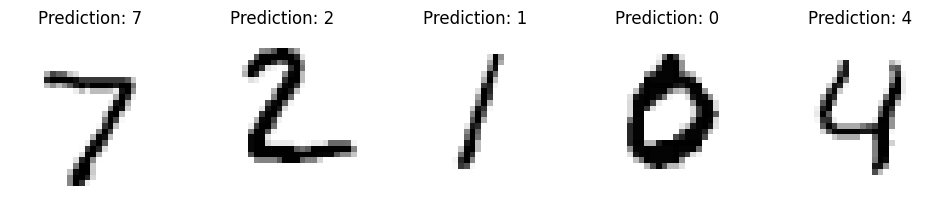

In [ ]:
test()

# (For Future Project) Write the above code in Hand

w_1 a_1 - w_2 a_2 + w_3 a_3 +w_4 a_4 + ... + w_n a_n

sigmoid:
δ(x) = 1/(1+e^(-x))

bias
only activate neuron when weighted sum > 10

δ(w_1 a_1 + w_2 a_2 + w_3 a_3 + ... + w_n a_n - 10)




28 x 28 low rs handwritten digits

each pixel (total 786 pixels) have each 0 to 255 values assigned to show whether its black or white

neural network:
0. input layer 784 nodes
1. hidden layer 10 nodes
2. output layr 10 nodes

forward propagation
- A_0 = x
- z_1 = w_1 dot A_0 + b_1
- A_1 = g(Z_1) = ReLu(Z_1)

rectified linear unit
| x if x > 0  |
| 0 if x <= 0 |

Softmax activation function


Back propagation
- dz_2 = A_2 - Y
- dw_2 = 1/m dz_2 A_1T

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape data to fit the neural network
x_train = x_train.reshape(x_train.shape[0], -1).T  # Shape (784, 60000)
x_test = x_test.reshape(x_test.shape[0], -1).T

# Initialize parameters
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    w3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2, w3, b3

# Activation and utility functions
def ReLU(val):
    return np.maximum(val, 0)

def softmax(Z):
    exp = np.exp(Z - np.max(Z)) # Prevent overflow
    return exp / exp.sum(axis=0)

def forward_prop(w1, b1, w2, b2, w3, b3, x):
    raw1 = w1.dot(x) + b1
    active1 = ReLU(raw1)
    raw2 = w2.dot(active1) + b2
    active2 = ReLU(raw2)
    raw3 = w3.dot(active2) + b3
    active3 = softmax(raw3)
    return raw1, active1, raw2, active2, raw3, active3

def d_Relu(val):
    return val > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y,np.arange(Y.size)] = 1
    return one_hot_Y

def backward_prop(X, Y, A1, A2, A3, W2, W3, Z1, Z2, m):
    one_hot_Y = one_hot(Y)
    dZ3 = 2*(A3 - one_hot_Y)
    dW3 = 1/m * (dZ3.dot(A2.T))
    db3 = 1/m * np.sum(dZ3,1)
    dZ2 = W3.T.dot(dZ3)*d_Relu(Z2)
    dW2 = 1/m * (dZ2.dot(A1.T))
    db2 = 1/m * np.sum(dZ2,1)
    dZ1 = W2.T.dot(dZ2)*d_Relu(Z1)
    dW1 = 1/m * (dZ1.dot(X.T))
    db1 = 1/m * np.sum(dZ1,1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1.reshape(-1, 1)  # Ensure db1 is column vector of shape (10, 1)
    w2 -= alpha * dw2
    b2 -= alpha * db2.reshape(-1, 1)  # Ensure db2 is column vector of shape (10, 1)
    w3 -= alpha * dw3
    b3 -= alpha * db3.reshape(-1, 1)  # Ensure db3 is column vector of shape (10, 1)
    return w1, b1, w2, b2, w3, b3


def get_predictions(val):
    return np.argmax(val, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(x, y, alpha, iterations):
    size, m = x.shape
    w1, b1, w2, b2, w3, b3 = init_params()
    for i in range(iterations):
        r1, a1, r2, a2, r3, a3 = forward_prop(w1, b1, w2, b2, w3, b3, x)
        dw1, db1, dw2, db2, dw3, db3 = backward_prop(x, y, a1, a2, a3, w2, w3, r1, r2, m)
        w1, b1, w2, b2, w3, b3 = update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        if i % 10 == 0:
            predictions = get_predictions(a3)
            print(f"Iteration: {i}, Accuracy: {get_accuracy(predictions, y)}")
    return w1, b1, w2, b2, w3, b3

# Set parameters and run gradient descent
alpha = 0.01  # Learning rate
iterations = 100  # Number of iterations
w1, b1, w2, b2, w3, b3 = gradient_descent(x_train, y_train, alpha, iterations)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<ipython-input-1-8173c53419ea>:28: RuntimeWarning: invalid value encountered in divide
  return exp / exp.sum(axis=0)


Iteration: 0, Accuracy: 0.09496666666666667


In [ ]:
# Predict on the test set
predictions = get_predictions(forward_prop(w1, b1, w2, b2, w3, b3, x_test)[5])

# Visualize some test images and the predicted labels
for i in range(5):
    plt.imshow(x_test[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.show()


https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/comments

In [ ]:
fruits = [1, 2, 3]
print(fruits[-1])